# Computational Methods - Homework 8
## Universidad de Antioquia

**Student:** Andrés Felipe Riaño Quintanilla

**ID:** 1083928808 

### a) Implement the above procedure numerically to find y(x) from:
$$ \frac{dy}{dx} = yx^2 -1.2y $$

* the initial condition is: y(0)=1 over the interval [0,2] 
* the range of x is actually the interval [0,2]
* plot the y(x) for h=0.5
* on the same plot compare it with the analytical solution of this differential equation, which is: $$y(x) = e^{x^3/3 -1.2x} $$

HINTS:
- think of the problem in terms of vectors $x$ and $y$.
- in the loop refer to the indices of $x_i$, $y_i$ and the function $f(x_i,y_i)$
- you can use np.arange to define your vector $x$ based on h and range
- you can use np.zeros to initialize $y$, remember to set y[0]=1

https://numpy.org/doc/stable/reference/generated/numpy.arange.html

y=np.zeros(len(x))
y[0]=1

### Solution to a):

In [1]:
import numpy as np

In [2]:
h = 0.5  #Spacing.
x = np.arange(0,2+h,h)  #Interval [0,2].
y = np.zeros(len(x))  
y[0] = 1  #Initial condition y(0) = 1.

for i in range(len(x)-1):
    
    y[i+1] = y[i] + (y[i]*x[i]**2-1.2*y[i])*h  #y_i+1 = y_i + f(x_i,y_i)*h

print('x = {}'.format(x))    
print('y = {}'.format(y))

x = [0.  0.5 1.  1.5 2. ]
y = [1.       0.4      0.21     0.189    0.288225]


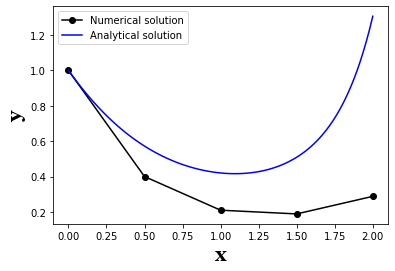

In [3]:
import matplotlib.pyplot as plt

X = np.linspace(0,2,100)
Y = lambda x: np.exp(x**3/3-1.2*x)  #Analytical solution.

fig, ax = plt.subplots(1,1)
ax.plot(x,y,color='black',marker='o',linestyle='-',label='Numerical solution')
ax.plot(X,Y(X),color='blue',label='Analytical solution')
font = {'family':'Georgia','weight':'bold','size':20}
plt.ylabel('y',**font)
plt.xlabel('x',**font)
plt.legend()

As x increases, the difference between the analytical solution and the numerical solution also increases. Let's look at the error at each point:

Text(0.5, 0, 'x')

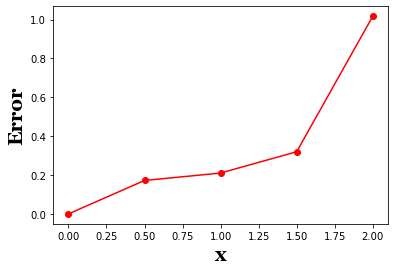

In [4]:
fig, ax = plt.subplots(1,1)
ax.plot(x,Y(x)-y,color='red',marker='o',linestyle='-')
font = {'family':'Georgia','weight':'bold','size':20}
plt.ylabel('Error',**font)
plt.xlabel('x',**font)

ASK YOURSELF:

* what if the range changes to [-2,2] and so the initial condition: 
x(0)=-2, y(0)=0.76
* is your code still working?
* can you easily change h?

In [5]:
h_ = 0.25  #Changing h.
x_ = np.arange(-2.,2+h_,h_)  #Changing the range.
y_ = np.zeros(len(x_))
y_[0] = 0.76  #Changing the initial condition.

for i in range(len(x_)-1):
    
    y_[i+1] = y_[i] + (y_[i]*x_[i]**2-1.2*y_[i])*h_

print('x = {}'.format(x_))    
print('y = {}'.format(y_))

x = [-2.   -1.75 -1.5  -1.25 -1.   -0.75 -0.5  -0.25  0.    0.25  0.5   0.75
  1.    1.25  1.5   1.75  2.  ]
y = [0.76       1.292      1.8935875  2.39065422 2.60730726 2.47694189
 2.08217928 1.5876617  1.1361704  0.79531928 0.56915036 0.43397715
 0.36481204 0.34657144 0.37797948 0.47719909 0.69939492]


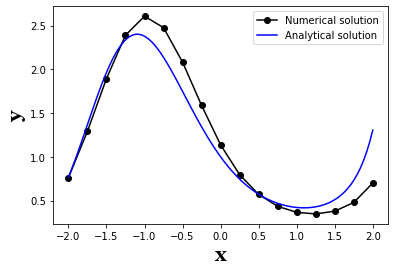

In [6]:
import matplotlib.pyplot as plt

X_ = np.linspace(-2,2,100)

fig, ax = plt.subplots(1,1)
ax.plot(x_,y_,color='black',marker='o',linestyle='-',label='Numerical solution')
ax.plot(X_,Y(X_),color='blue',label='Analytical solution')
font = {'family':'Georgia','weight':'bold','size':20}
plt.ylabel('y',**font)
plt.xlabel('x',**font)
plt.legend()

If h, the range and the initial condition change, it is necessary modify the code. Then, the new code can working.

### b) write a function euler_int() that accepts four arguments and returns two

x,y=euler_int(func,intrange,h,yinit)

intrange[0,2]
where func() is:

def func(xi,yi):
    return


and test your code by running the cell below. Compare with the plot below

```python
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1)

intrange=[-2.0,2.0]
h=0.5
yinit=0.76
x1,y1=euler_int(func,intrange,h,yinit)
ax.plot(x1,y1,'-r',label='h=0.5')

intrange=[-2.0,2.0]
h=0.25
yinit=0.76
x2,y2=euler_int(func,intrange,h,yinit)
ax.plot(x2,y2,'-b',label='h=0.25')

intrange=[-2.0,2.0]
h=0.05
yinit=0.76
x3,y3=euler_int(func,intrange,h,yinit)
ax.plot(x3,y3,'-g',label='h=0.05')

xexact=np.linspace(intrange[0],intrange[-1],101)
yexact=np.exp((xexact**3)/3-1.2*xexact)
ax.plot(xexact,yexact,'-k',label='exact')

ax.set_xlabel('x')
ax.set_ylabel('ode')
ax.legend()
plt.show()
```

<img src="imgs/homework_sol.png" width="400" />

### Solution to b):

In [7]:
func = lambda x,y: y*x**2-1.2*y  #f(x,y).

def euler_int(func,intrange,h,yinit):
    
    x = np.arange(intrange[0],intrange[1]+h,h)
    y = np.zeros(len(x))
    y[0] = yinit
    
    for i in range(len(x)-1):
        
        y[i+1] = y[i] + func(x[i],y[i])*h  #y_i+1 = y_i + f(x_i,y_i)*h
     
    return x,y

Let's test the code:

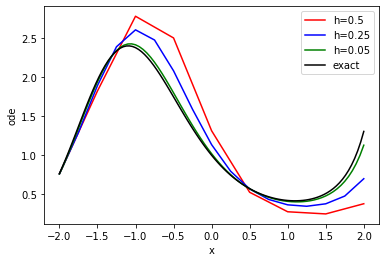

In [8]:
import matplotlib.pyplot as plt
fig,ax=plt.subplots(1,1)

intrange=[-2.0,2.0]
h=0.5
yinit=0.76
x1,y1=euler_int(func,intrange,h,yinit)
ax.plot(x1,y1,'-r',label='h=0.5')

intrange=[-2.0,2.0]
h=0.25
yinit=0.76
x2,y2=euler_int(func,intrange,h,yinit)
ax.plot(x2,y2,'-b',label='h=0.25')

intrange=[-2.0,2.0]
h=0.05
yinit=0.76
x3,y3=euler_int(func,intrange,h,yinit)
ax.plot(x3,y3,'-g',label='h=0.05')

xexact=np.linspace(intrange[0],intrange[-1],101)
yexact=np.exp((xexact**3)/3-1.2*xexact)
ax.plot(xexact,yexact,'-k',label='exact')

ax.set_xlabel('x')
ax.set_ylabel('ode')
ax.legend()
plt.show()

The first plot and this plot are equal.

In this plot we can see that when h decreases, the numerical solution approaches the analytical solution. Let's see the error for each h:

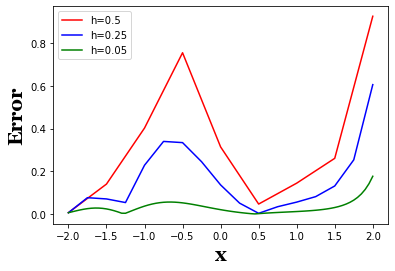

In [9]:
fig,ax=plt.subplots(1,1)

intrange=[-2.0,2.0]
h=0.5
yinit=0.76
x1,y1=euler_int(func,intrange,h,yinit)
ax.plot(x1,np.abs(Y(x1)-y1),'-r',label='h=0.5')

intrange=[-2.0,2.0]
h=0.25
yinit=0.76
x2,y2=euler_int(func,intrange,h,yinit)
ax.plot(x2,np.abs(Y(x2)-y2),'-b',label='h=0.25')

intrange=[-2.0,2.0]
h=0.05
yinit=0.76
x3,y3=euler_int(func,intrange,h,yinit)
ax.plot(x3,np.abs(Y(x3)-y3),'-g',label='h=0.05')

ax.set_xlabel('x',**font)
ax.set_ylabel('Error',**font)
ax.legend()
plt.show()

Indeed, when h decreases, the error also decreases.